In [1]:
%matplotlib inline
import pandas as pd
idx = pd.IndexSlice

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
%%time
#cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast = pd.read_csv('data/cast.csv', index_col=None)

CPU times: user 2.65 s, sys: 318 ms, total: 2.97 s
Wall time: 3.04 s


In [6]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [7]:
%%time
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                            parse_dates=['date'], infer_datetime_format=True)

CPU times: user 283 ms, sys: 23 ms, total: 306 ms
Wall time: 377 ms


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [9]:
titles = cast[['title', 'year']].drop_duplicates().reset_index(drop=True)
titles.head()

,title,year
0,Closet Monster,2015
1,Suuri illusioni,1985
2,Battle of the Sexes,2017
3,Secret in Their Eyes,2015
4,Steve Jobs,2015


### Years

In [10]:
# 1. How many movies are listed in the `titles` dataframe?

len(titles)

182498

In [11]:
# 1. What is the name and year of the very first movie ever made?

titles.sort_values('year').head(1)

,title,year
126594,Miss Jerry,1894


In [12]:
# 1. How many years into the future does the IMDB database list movie titles?

titles.sort_values('year').tail(3)#.year - 2015

,title,year
128286,Avatar 4,2024
128287,Avatar 5,2025
163857,100 Years,2115


In [13]:
# 1. How many movies listed in `titles` came out in 1950?

len(titles[titles.year == 1950])

# or: (titles.year == 1950).sum()

919

In [14]:
# 1. How many movies came out in 1960?

len(titles[titles.year == 1960])

1080

In [15]:
# 1. How many movies came out in each year of the 1970s?
#    (Hint: try a Python "for" loop.)

for y in range(1970, 1980):
    print(y, (titles.year == y).sum())

1970 1495
1971 1336
1972 1359
1973 1406
1974 1415
1975 1258
1976 1277
1977 1236
1978 1249
1979 1294


In [16]:
# 1. How many movies came out during your own lifetime,
#    from the year of your birth through 2014?

len(titles[(titles.year >= 1974) & (titles.year <= 2014)])

98765

In [17]:
# 2. Use "value_counts" to determine how many movies came out
#    in each year of the 1970s.

titles[titles.year // 10 == 197].year.value_counts().sort_index()

1970    1495
1971    1336
1972    1359
1973    1406
1974    1415
1975    1258
1976    1277
1977    1236
1978    1249
1979    1294
Name: year, dtype: int64

In [21]:
# 3. Use "groupby" to determine how many movies came out in each year of the 1970s.
# The result is a Series not a DataFrame (use `.count()` for a DataFrame)
titles.groupby('year').size().loc[1970:1979]

year
1970    1495
1971    1336
1972    1359
1973    1406
1974    1415
1975    1258
1976    1277
1977    1236
1978    1249
1979    1294
dtype: int64

### Titles

In [17]:
# 1. What are the names of the movies made through 1906?

titles[titles.year <= 1906][['title']]

,title
100983,Miss Jerry
104766,Soldiers of the Cross
140912,Can Can
142404,The Story of the Kelly Gang
173490,Jeffries-Sharkey Contest
173746,Valsons
173859,The Joe Gans-Battling Nelson Fight
174032,Battle of Jeffries and Sharkey for Championshi...
174343,Sr. Wrangler Mr. R.P. Paranjpe
205246,Lika mot lika


In [18]:
# 1. What movies have titles that fall between Star Trek and Star Wars in the alphabet?

titles[(titles.title >= 'Star Trek') & (titles.title <= 'Star Wars')]

,title,year
2056,Star Wars,1977
9814,Star Trek,2009
9886,Star Trek Into Darkness,2013
27553,Star Trek III: The Search for Spock,1984
29784,Star Trek: The Wrath of Khan,1982
30814,Star Trek: The Motion Picture,1979
33378,Star Trek: Nemesis,2002
39810,Star Trek: First Contact,1996
39824,Star Trek: Generations,1994
59379,Star Trek VI: The Undiscovered Country,1991


In [22]:
# 2. Use an index and .loc[] to find the movies whose titles fall between Star Trek
#    and Star Wars in the alphabet.

t = titles.copy()
t = t.set_index('title').sort_index()
t.loc['Star Trek':'Star Wars']

,year
title,
Star Trek,2009
Star Trek I: Specter of the Past,2010
Star Trek II: Retribution,2012
Star Trek III: Redemption,2013
Star Trek III: The Search for Spock,1984
Star Trek IV: The Voyage Home,1986
Star Trek V: The Final Frontier,1989
Star Trek VI: The Undiscovered Country,1991
Star Trek: Beyond,2016


In [20]:
# 2. Use an index and .loc[] to retrieve the names of the movies made through 1906.

titles.set_index('year').sort_index().loc[1800:1906]

,title
year,
1894,Miss Jerry
1898,Can Can
1899,Jeffries-Sharkey Contest
1899,Battle of Jeffries and Sharkey for Championshi...
1900,Soldiers of the Cross
1902,Sr. Wrangler Mr. R.P. Paranjpe
1905,Valsons
1905,Eine Fliegenjagd oder Die Rache der Frau Schultze
1906,The Story of the Kelly Gang


In [21]:
# 2. What are the 15 most common movie titles in film history?


titles.title.value_counts().head(15)


Hamlet           17
Macbeth          14
Carmen           14
Anna Karenina    12
Maya             11
Underground      11
Anna             10
Revenge          10
Temptation       10
The Outsider     10
Jackpot          10
Othello          10
Blood Money      10
She              10
Rage              9
dtype: int64

In [30]:
# Use this for session 3?
i = cast.set_index('name').sort_index()
a = i.loc['Cary Grant',['year','n']].groupby('year').agg(['min', 
                                                          'mean', 
                                                          'max'])

<AxesSubplot:xlabel='year'>

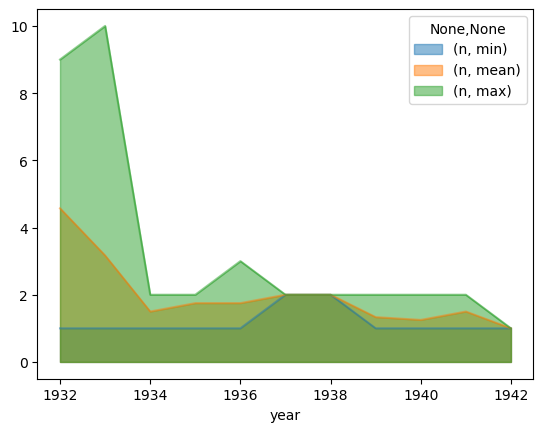

In [47]:
a.loc[:1942].plot(kind='area', stacked=False)
#a

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

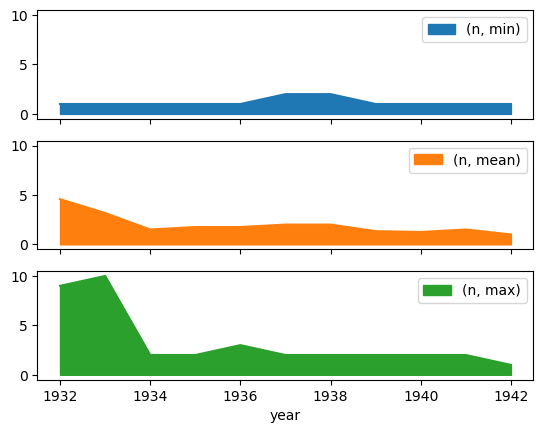

In [48]:
# Alternative for different config of subplots
#from matplotlib import pylab as plt
#(fig, (ax0,ax1,ax2)) = plt.subplots(1,3,figsize=(10,8),sharey=True)
#a.loc[:1942].plot(y=('n','min'),kind='line',ax=ax0)

a.loc[:1942].plot(kind='area',subplots=True,sharey=True)

In [24]:
# 5. What are the 5 longest movie titles ever?

pd.set_option('max_colwidth', 300)

t = titles.copy()
t['len'] = t.title.str.len()
t = t.sort_values('len', ascending=False)
t.head()

,title,year,len
163401,"Night of the Day of the Dawn of the Son of the Bride of the Return of the Revenge of the Terror of the Attack of the Evil Mutant Hellbound Flesh Eating Crawling Alien Zombified Subhumanoid Living Dead, Part 5",2011,208
154042,"Night of the Day of the Dawn of the Son of the Bride of the Return of the Revenge of the Terror of the Attack of the Evil, Mutant, Hellbound, Flesh-Eating Subhumanoid Zombified Living Dead, Part 3",2005,196
120466,Las poquianchis (De los pormenores y otros sucedidos del dominio público que acontecieron a las hermanas de triste memoria a quienes la maledicencia así las bautizó),1976,165
40308,Entrei em Pânico ao Saber o que Vocês Fizeram na Sexta-feira 13 do Verão Passado Parte 2 - A Hora da Volta da Vingança dos Jogos Mortais de Halloween,2011,149
173052,Die Antigone des Sophokles nach der Hölderlinschen Übertragung für die Bühne bearbeitet von Brecht 1948 (Suhrkamp Verlag),1992,121


In [25]:
# 5. What are the 15 most popular movie titles, if you strip off the suffixes like
#    (II) and (III) that the IMDB adds to distinguish movies shown in the same year?

titles.title.str.extract('^([^(]*)').value_counts().head(15)

                 24
Hamlet           17
Broken           15
Macbeth          14
Carmen           14
Anna Karenina    12
Underground      11
Maya             11
Alone            10
Othello          10
Revenge          10
Love             10
The Outsider     10
Blood Money      10
Temptation       10
dtype: int64

### How many movies actors have been in

In [26]:
# 1. How many movies has Judi Dench acted in?

len(cast[cast.name == 'Judi Dench'])

51

In [27]:
# 1. How many movies did Sidney Poitier appear in?

c = cast
c = c[c.name == 'Sidney Poitier']
len(c)

43

In [28]:
# 1. In how many of his movies was Sidney Poitier the lead (`n==1`)?

c = cast
c = c[c.name == 'Sidney Poitier']
c = c[c.n == 1]
len(c)

21

### Pulling and displaying movie credits

In [29]:
# 1. List the movies, sorted by year, in which Judi Dench starred as lead actor.

c = cast
c = c[c.name == 'Judi Dench']
c = c[c.n == 1]
c.sort_values('year')

,title,year,name,type,character,n
1762207,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1
3110457,Ladies in Lavender,2004,Judi Dench,actress,Ursula,1
3407847,Mrs Henderson Presents,2005,Judi Dench,actress,Mrs. Laura Henderson,1
3363284,Notes on a Scandal,2006,Judi Dench,actress,Barbara Covett,1
3363282,The Best Exotic Marigold Hotel,2011,Judi Dench,actress,Evelyn Greenslade,1
2702221,Philomena,2013,Judi Dench,actress,Philomena,1


In [30]:
# 1. Who was credited in the 1972 version of Sleuth, in order by `n` rank?

c = cast
c = c[c.title == 'Sleuth']
c = c[c.year == 1972]
c.sort_values('n')

,title,year,name,type,character,n
2815436,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1
1985454,Sleuth,1972,Michael Caine,actor,Milo Tindle,2
2004531,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3
2707118,Sleuth,1972,John Matthews (II),actor,Detective Sergeant Tarrant,4
3292963,Sleuth,1972,Eve Channing (III),actress,Marguerite Wyke,5
2693963,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6


### Common character names

In [31]:
# 2. What are the 11 most common character names in movie history?

cast.character.value_counts().head(11)

Himself      24293
Dancer       11697
Extra         8865
Reporter      7792
Doctor        7666
Herself       7501
Policeman     7245
Student       6694
Nurse         6636
Bartender     6298
Zombie        5785
dtype: int64

In [58]:
# 3a. Which actors have played the role “Himself” the most times?

c = cast
c = c[c.character == 'Himself']
c = c.groupby('name').size().sort_values()
c.tail(20)

name
Walter Cronkite          12
John Lennon              12
Jimmy Carter             13
Fidel Castro             13
Lyndon Johnson           14
Billy Graham             15
Barack Obama             16
Joseph Stalin            17
Muhammad Ali             18
Ron Jeremy               20
Franklin D. Roosevelt    20
Benito Mussolini         21
Bill Clinton             22
Martin Luther King       23
Winston Churchill        24
George W. Bush           24
John F. Kennedy          35
Ronald Reagan            37
Richard Nixon            43
Adolf Hitler             91
dtype: int64

In [55]:
# 3b. Which actors have played the role “Zombie” the most times?

c = cast
c = c[c.character == 'Zombie']
c = c.groupby('name').size().sort_values()
c.tail(5)

name
Gloria Rice            1
Zarina Donato          1
Chris (LXVII) Lewis    2
David (XIV) Rodgers    2
Becky Damaske          2
dtype: int64

In [60]:
# 3c. Which ten people have appeared most often as “Herself” over the history of film?

c = cast
c = c[c.character == 'Herself']
c = c.groupby('name').size().sort_values()
c.tail(20)

name
Aleiska von Lippke            5
G.I. Ho                       5
Nancy Reagan                  5
Mary Jo Pehl                  5
Ángela Silván                 5
Princess Diana                5
Sumie Sakai                   6
María Isabel (III) Martín     6
Rekha                         6
Joan Rivers                   6
Oprah Winfrey                 6
Inés J. Southern              6
Marta Berrocal                6
Marilyn Monroe                6
Hillary Clinton               8
Joyce Brothers                8
Margaret Thatcher             8
Luisa Horga                   9
María Luisa (V) Martín        9
Queen Elizabeth II           11
dtype: int64

In [67]:
# 3. Which 20 people have appeared most often as “Himself” over the history of film?

c = cast
c = c[c.character == 'Himself']
c = c.groupby('name').size().sort_values()
c.tail(20)

name
Walter Cronkite          12
John Lennon              12
Jimmy Carter             13
Fidel Castro             13
Lyndon Johnson           14
Billy Graham             15
Barack Obama             16
Joseph Stalin            17
Muhammad Ali             18
Ron Jeremy               20
Franklin D. Roosevelt    20
Benito Mussolini         21
Bill Clinton             22
Martin Luther King       23
Winston Churchill        24
George W. Bush           24
John F. Kennedy          35
Ronald Reagan            37
Richard Nixon            43
Adolf Hitler             91
dtype: int64

In [70]:
# 4. Take the 50 most common character names in film.
#    Which are most often played by men?

c = cast
clist = c.character.value_counts().head(50)
clist.head()

Himself     19637
Dancer      12019
Extra       10848
Reporter     7818
Doctor       6963
Name: character, dtype: int64

In [71]:
clist.tail()

David      2179
Frank      2154
Teacher    2139
Mary       2072
Sarah      2057
Name: character, dtype: int64

In [68]:
cast_by_character = cast.sort_values('character').set_index('character')

In [79]:
c = cast_by_character.loc[clist.index][['type']]

In [80]:
c

,type
character,
Himself,actor
Himself,actor
Himself,actor
Himself,actor
Himself,actor
...,...
Sarah,actress
Sarah,actress
Sarah,actress


In [81]:
c = c.reset_index()
c = c.groupby(['character', 'type']).size()
c

character          type   
Additional Voices  actor      1959
                   actress    1193
Anna               actor        78
                   actress    2431
Bar Patron         actor      2739
                              ... 
Waiter             actress      50
Waitress           actor       144
                   actress    4261
Wedding Guest      actor      1424
                   actress    1248
Length: 100, dtype: int64

In [77]:
c = c.unstack()
c

type,actor,actress
character,,
Additional Voices,1959,1193
Anna,78,2431
Bar Patron,2739,1405
Barfly,2832,77
Bartender,5442,848
Boy,2223,16
Cop,2672,97
Dancer,4548,7471
David,2173,6


In [38]:
c['ratio'] = c.actress / (c.actor + c.actress)
c = c.sort_values('ratio')
c.head()

type,actor,actress,ratio
character,,,
Townsman,4963,3,0.000604
John,2628,2,0.000760
Henchman,4876,4,0.000820
Policeman,7233,12,0.001656
Himself,24251,42,0.001729


In [39]:
# 4. …which of those 50 characters are most often played by women?

c.tail()

type,actor,actress,ratio
character,,,
Anna,86,2868,0.970887
Mary,46,2232,0.979807
Girl,43,2513,0.983177
Maria,27,3080,0.991310
Herself,59,7442,0.992134


In [40]:
# 4. …which of those 50 characters have a ratio closest to 0.5?

c[(c.ratio > 0.4) & (c.ratio < 0.6)]

type,actor,actress,ratio
character,,,
Student,3845,2849,0.425605
Singer,1706,1811,0.514927
Teacher,1079,1234,0.533506


### Who has been in the most movies

In [41]:
# 2. Which actors or actresses appeared in the most movies in the year 1945?

cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan       39
Sam Harris (II)    30
Harold Miller      28
Bess Flowers       28
Nolan Leary        27
Frank O'Connor     26
Edmund Cobb        24
Franklyn Farnum    24
Tom London         24
Pierre Watkin      24
dtype: int64

In [42]:
# 2. Which actors or actresses appeared in the most movies in the year 1985?

cast[cast.year == 1985].name.value_counts().head(10)

Mammootty           34
Shakti Kapoor       26
Mohanlal            22
Sukumari            19
Satyendra Kapoor    17
Kader Khan          16
Asrani              16
Rajesh Khanna       15
Aruna Irani         15
Raj Babbar          15
dtype: int64

In [83]:
%%time
# 2. Create a `cast_by_title_year` dataframe indexed by title and year
#    to use in the next few questions.

cast_by_title_year = cast.set_index(['title', 'year']).sort_index()
cast_by_title_year.head()

CPU times: user 1.44 s, sys: 235 ms, total: 1.67 s
Wall time: 1.69 s


name     type       character    n
title year                                               
#211  2018     Sapir Azulay  actress          Jacobs  NaN
      2018           Bleona  actress       Christine  NaN
      2018     Amanda Cerny  actress           Sarah  9.0
      2018  Mackenzie Evans  actress            Girl  NaN
      2018    Liza Mircheva  actress  Elizabeth Grey  NaN

In [84]:
%%time
# 2. Use `cast_by_title_year` to find the stars of the film Inception
#    and order them by `n` before displaying the top 10.

cast_by_title_year.loc['Inception'].sort_values('n').head(10)

CPU times: user 16.6 ms, sys: 1.99 ms, total: 18.6 ms
Wall time: 16.2 ms


,name,type,character,n
year,,,,
2010,Leonardo DiCaprio,actor,Cobb,1.0
2010,Joseph Gordon-Levitt,actor,Arthur,2.0
2010,Ellen Page,actress,Ariadne,3.0
2010,Tom Hardy,actor,Eames,4.0
2010,Ken Watanabe,actor,Saito,5.0
2010,Dileep Rao,actor,Yusuf,6.0
2010,Cillian Murphy,actor,Robert Fischer,7.0
2010,Tom Berenger,actor,Browning,8.0
2010,Marion Cotillard,actress,Mal,9.0


In [45]:
# 2. Use `cast_by_title_year` to find the first 10 stars in the 1996 film Hamlet,
#    and order them by `n`.

cast_by_title_year.loc['Hamlet',1996].sort_values('n').head(10)

name     type                 character   n
title  year                                                             
Hamlet 1996            Riz Abbasi    actor     Attendant to Claudius   1
       1996  Richard Attenborough    actor        English Ambassador   2
       1996       David Blair (V)    actor     Attendant to Claudius   3
       1996         Brian Blessed    actor  Ghost of Hamlet's Father   4
       1996       Kenneth Branagh    actor                    Hamlet   5
       1996        Richard Briers    actor                  Polonius   6
       1996        Michael Bryant    actor                    Priest   7
       1996          Peter Bygott    actor     Attendant to Claudius   8
       1996        Julie Christie  actress                  Gertrude   9
       1996         Billy Crystal    actor         First Gravedigger  10

In [87]:
%%time
# 2. Write a `for` loop that, for the top 9 actors in the 1977 movie Star Wars,
#    determines how many movies they starred in after 1977.

names = cast_by_title_year.loc['Star Wars',1977].sort_values('n').head(9).name
for name in names:
    print(name, len(cast[(cast.name == name) & (cast.year > 1977)]))

Mark Hamill 40
Harrison Ford 43
Carrie Fisher 38
Peter Cushing 7
Alec Guinness 9
Anthony Daniels 13
Kenny Baker 18
Peter (II) Mayhew 6
David Prowse 5
CPU times: user 1.62 s, sys: 79.5 ms, total: 1.69 s
Wall time: 1.67 s


In [85]:
# 2. Create an indexed version of `cast` that, once built, lets you answer
#    the previous question with a `for` loop that finishes in under a second.

i = cast.set_index('name').sort_index()

In [88]:
%%time
for name in names:
    c = i.loc[name]
    c = c[c.year > 1977]
    #c = c[(c.character != 'Himself') & (c.character != 'Herself')]
    print(name, len(c))

Mark Hamill 40
Harrison Ford 43
Carrie Fisher 38
Peter Cushing 7
Alec Guinness 9
Anthony Daniels 13
Kenny Baker 18
Peter (II) Mayhew 6
David Prowse 5
CPU times: user 709 ms, sys: 20 ms, total: 729 ms
Wall time: 734 ms


In [49]:
# 3. How many people were cast in each of the movies named "Hamlet”?

c = cast
c = c[c.title == 'Hamlet']
c = c.groupby('year').size() 
c

year
1910     1
1911     6
1913    21
1921     9
1948    25
1954     1
1964    33
1969    24
1973     8
1976    11
1987     3
1990    29
1996    55
2000    38
2009    17
2011    12
2015     6
dtype: int64

In [100]:
#c.loc['Hamlet':'Hamlet (Z'].index.value_counts()
c.loc['Hamlet':'Hamlet (Z'].groupby(level=1).size()

year
1910     1
1911     6
1913    21
1921     9
1948    24
1954     5
1964    54
1969    24
1973     8
1976    11
1987     3
1990    29
1996    54
2000    38
2007    18
2009    17
2011    12
2014     1
2015    33
2016     8
2017    33
dtype: int64

In [97]:
# 5. How many actors are in the cast of each version of Hamlet,
#    including Hamlets with IMDB name collisions like "Hamlet (II)"
#    and "Hamlet (III)"? [BAD]

c = cast_by_title_year
# This one is not bad, right counts ugly index
# c.loc['Hamlet':'Hamlet (Z'].index.value_counts()    - Drat
# This one has three groups (Hamlet, Hamlet (II), and Hamlet (III))
# c.loc['Hamlet':'Hamlet (Z'].groupby(level=0).size() - Drat
# This one combines the counts of Hamlet, 1964 and Hamlet (II), 1964
# c.loc['Hamlet':'Hamlet (Z'].groupby(level=1).size() - Drat
c.loc['Hamlet':'Hamlet (Z'].groupby(level=[0,1]).size()

# Or:
#c = cast[(cast.title >= 'Hamlet') & (cast.title < 'Hamlet (Z')]
#c.groupby(['title', 'year']).size()

title         year
Hamlet        1910     1
              1911     6
              1913    21
              1921     9
              1948    24
              1954     5
              1964    33
              1969    24
              1973     8
              1976    11
              1987     3
              1990    29
              1996    54
              2000    38
              2009    17
              2011    12
              2014     1
              2015    23
              2016     8
              2017    15
Hamlet (II)   1964    21
              2007    16
              2015    10
              2017    18
Hamlet (III)  2007     2
dtype: int64

### Actors and Actresses

In [101]:
# 4. Build a dataframe with a row for each year with two columns:
#    the number of roles for actors in that year's films,
#    and the number of roles for actresses.

aa = cast[['year', 'type']].groupby(['year', 'type']).size()
aa = aa.loc[:2014].unstack()
aa.head()

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN


<AxesSubplot:xlabel='year'>

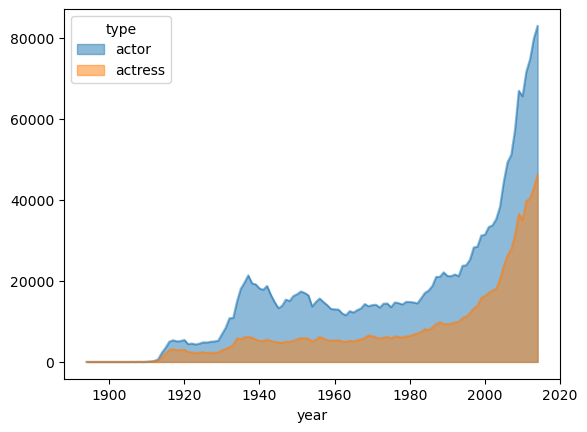

In [102]:
# 4. Use that dataframe to make a kind='area' plot showing the total
#    number of roles available over the history of film.

#aa.plot(kind='area')
# More clearly shows the amount of difference (blue area above orange)
aa.plot(kind='area',stacked=False)

Show percentage of actor roles: Quantify the degree of difference.

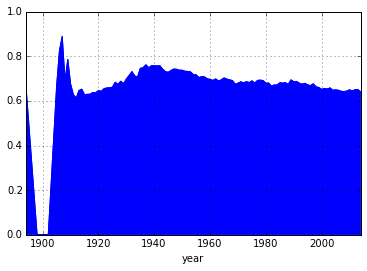

In [53]:
f = aa.actor / (aa.actor + aa.actress)
f.plot(ylim=[0,1], kind='area')

This is more complicated than what we did with a simple `stacked=False`
but breaks out starring roles (`n<= 3`).  Not sure why we didnt simply do `groupby(['year', 'type'])`.  See next plot, y-axis numbers are different,
both with and without stacking, because the plot below uses only
starring roles (n=1).

<AxesSubplot:xlabel='year'>

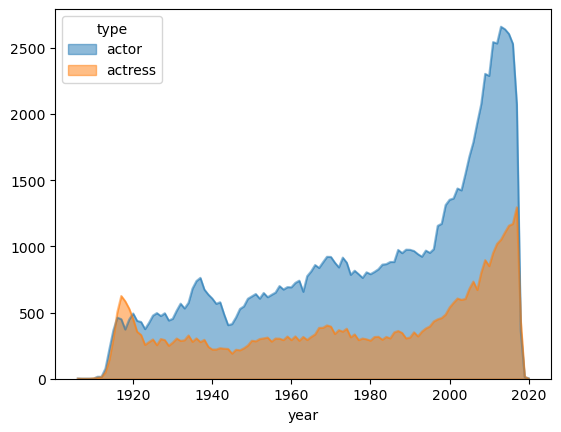

In [126]:
c = cast
#c = c[c.year // 10 == 198]
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack(1)
# make n toplevel idx; get vals for n=1
starring_roles = c.swaplevel(0,1).loc[1]
starring_roles.plot(ylim=0, kind='area',stacked=False)
#f = c.actor / (c.actor + c.actress)
#f = f.unstack()
#f.plot(ylim=[0,1])

<AxesSubplot:xlabel='year'>

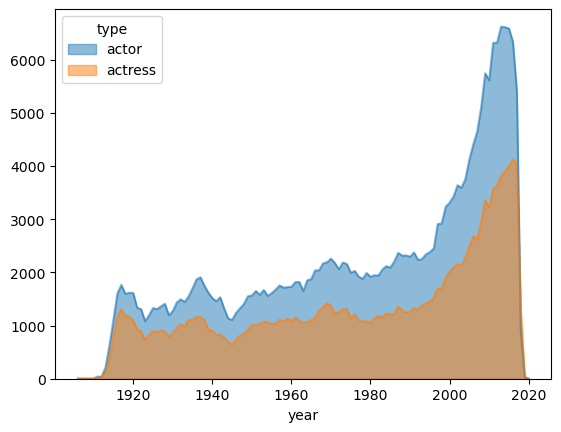

In [108]:
c = cast
#c = c[c.year // 10 == 198]
c = c[c.n <= 3]
c = c.groupby(['year', 'type']).size()
c = c.unstack(1)
c.plot(ylim=0, kind='area',stacked=False)
#f = c.actor / (c.actor + c.actress)
#f = f.unstack()
#f.plot(ylim=[0,1])

### Rank over time

In [55]:
# 2. Define “leading actor” as an actor or actress whose `n==1`
#    and “supporting actor” as `n==2` — what is the average year
#    of all the supporting roles Judi Dench has had?

c = cast
c = c[c.name == 'Judi Dench']
print(c[c.n == 2].year.mean())

1986.83333333


In [56]:
# 2. What is the average year of Judi Dench’s leading roles —
#    is her career moving forwards toward leading roles
#    or backwards towards supporting ones?

print(c[c.n == 1].year.mean())

2006.0


In [133]:
# 2. Did Sidney Poitier move forward or back over his career?

c = cast
c = c[c.name == 'Sidney Poitier']
print(c[c.n == 2].year.mean())
print(c[c.n == 1].year.mean())

1961.75
1970.4761904761904


In [132]:
# 2. What about Michael Caine?

c = cast
c = c[c.name == 'Michael Caine']
# Try >=2 .  What happens?
print(c[c.n >= 2].year.mean())
print(c[c.n == 1].year.mean())

1990.625
1984.4117647058824


In [59]:
c = cast
#c = c[c.year // 10 == 195]
c = c[c.n.notnull()].groupby('name').n.agg(['size', 'mean'])
c.head()

,size,mean
name,,
!Mystery Girl!,1,29
'Ace' Reitman,1,11
'Agent' Ava Hubbard,1,29
'Amarillo Slim' Preston,1,31
'Apple' Hamidu,1,71


In [60]:
c = c[c['size'] >= 10]
c = c.sort_values('mean')
c.head(60)

,size,mean
name,,
Stanley Lupino,13,1.000000
Ferdi Tayfur (II),11,1.000000
Harold Lloyd,19,1.000000
Orhan Gencebay,11,1.000000
Mohamad Ali Fardin,11,1.000000
Jeyam Ravi,16,1.000000
Amácio Mazzaropi,26,1.000000
Emmy Wehlen,18,1.000000
Edna Goodrich,11,1.000000


### Release dates

In [61]:
release_dates.head()

,title,year,country,date
0,0_1_0,2008,Poland,2008-11-14
1,Ai no Sanka,1967,Japan,1967-01-01
2,A Thousand to One,1920,USA,1920-12-05
3,A Prince of a King,1923,USA,1923-10-13
4,A Prince of a King,1923,Netherlands,1924-08-08


In [166]:
# 5. In which month is a movie whose name starts with the text
#    "The Lord of the Rings" most likely to be released?

r = release_dates
r = r[r.title.str.startswith('The Lord of the Rings')]
r = r[r.country == 'USA']
r.date.dt.month.value_counts()

12    3
11    1
dtype: int64

In [172]:
# 5. In which months is a movie whose name ends in the word "Christmas"
#    most likely to be released?

r = release_dates
r = r[r.title.str.endswith('Christmas')]
r = r[r.country == 'USA']
r.date.dt.month.value_counts()

11    19
12    11
10     9
1      2
7      1
4      1
2      1
dtype: int64

In [62]:
rd = release_dates.set_index(['title', 'year']).sort_index()
rd.head()

,,country,date
title,year,,
"#73, Shaanthi Nivaasa",2007,India,2007-06-15
#Beings,2015,Romania,2015-01-29
#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
#Horror,2015,USA,2015-01-01
#Nerealnaya lyubov,2014,Russia,2014-02-13


In [117]:
rd.loc[[('#Beings', 2015), ('#Horror', 2015)]]

,,country,date
title,year,,
#Beings,2015,Romania,2015-01-29
#Horror,2015,USA,2015-01-01


In [124]:
c = cast
c = c[c.name == 'Tom Cruise'][['title', 'year']].drop_duplicates()
#c = c.join(rd, ['title', 'year'])
#c = c[c.country == 'USA']
#c.date.dt.month.value_counts().sort_index().plot(kind='bar')
c.values

array([['Top Gun', 1986],
       ['Legend', 1985],
       ['Oblivion', 2013],
       ['Collateral', 2004],
       ['Endless Love', 1981],
       ['Austin Powers in Goldmember', 2002],
       ['August', 2008],
       ['The Queen', 2006],
       ["Losin' It", 1983],
       ['Edge of Tomorrow', 2014],
       ['Mission: Impossible III', 2006],
       ['Mission: Impossible', 1996],
       ['Mission: Impossible - Rogue Nation', 2015],
       ['Mission: Impossible - Ghost Protocol', 2011],
       ['Mission: Impossible II', 2000],
       ['War of the Worlds', 2005],
       ['Knight and Day', 2010],
       ['Minority Report', 2002],
       ['Cocktail', 1988],
       ['The Outsiders', 1983],
       ['Rock of Ages', 2012],
       ['All the Right Moves', 1983],
       ['Taps', 1981],
       ['Jerry Maguire', 1996],
       ['The Last Samurai', 2003],
       ['Born on the Fourth of July', 1989],
       ['Far and Away', 1992],
       ['Magnolia', 1999],
       ['Vanilla Sky', 2001],
       ['Tropic T

In [128]:
# ASK
# rd.loc[c]
# rd.loc[c.values]
# rd.loc[list(c.values)]

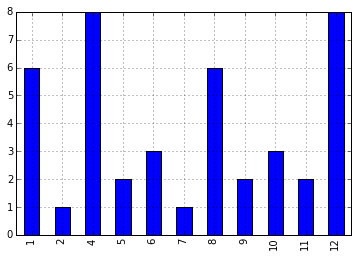

In [138]:
# 5. In what months of the year have Helen Mirren movies been most often released?

c = cast
c = c[c.name == 'Helen Mirren'][['title', 'year']].drop_duplicates()
c = c.join(rd, ['title', 'year'])
c = c[c.country == 'USA']
c.date.dt.month.value_counts().sort_index().plot(kind='bar')

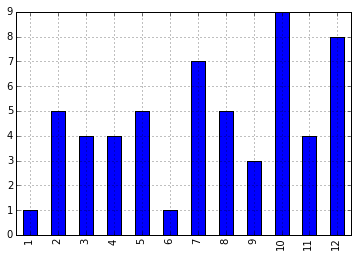

In [139]:
# 5. …Jeff Bridges movies?

c = cast
c = c[c.name == 'Jeff Bridges'][['title', 'year']].drop_duplicates()
c = c.join(rd, ['title', 'year'])
c = c[c.country == 'USA']
c.date.dt.month.value_counts().sort_index().plot(kind='bar')

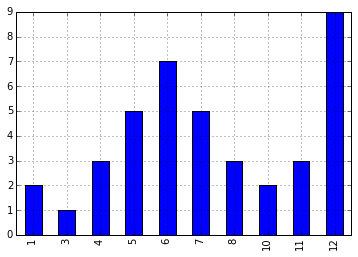

In [141]:
# 5. …Tom Cruise movies?

c = cast
c = c[c.name == 'Tom Cruise'][['title', 'year']].drop_duplicates()
c = c.join(rd, ['title', 'year'])
c = c[c.country == 'USA']
c.date.dt.month.value_counts().sort_index().plot(kind='bar')

In [155]:
%%time
# 5. Use join() to build a table of release dates indexed by actor,
#    and use it to re-run the previous three questions efficiently.

c = cast
c = c[['name', 'title', 'year']]
c = c.join(rd, ['title', 'year'])
c = c[c.country == 'USA']
c = c.set_index('name').sort_index()
releases = c
releases.head()

CPU times: user 19.8 s, sys: 3.83 s, total: 23.6 s
Wall time: 23.7 s


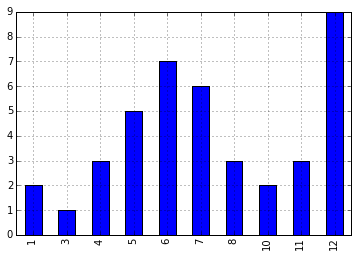

In [178]:
releases.loc['Tom Cruise'].date.dt.month.value_counts().sort_index().plot(kind='bar')

In [182]:
# pivot(self, index=None, columns=None, values=None)

In [183]:
cast.head()

,title,year,name,type,character,n
0,The Core,2003,Alejandro Abellan,actor,U.S.S. Soldier,NaN
1,Il momento di uccidere,1968,Remo De Angelis,actor,Dago,9
2,Across the Divide,1921,Thomas Delmar,actor,Dago,4
3,Revan,2012,Diego James,actor,Dago,NaN
4,Un homme marche dans la ville,1950,Fabien Loris,actor,Dago,12


In [205]:
c = cast
c = c[c.year >= 1990]
c = c[c.year <= 1993]
c = c[c.name == 'George Clooney']
#c = c[c.title == 'Inception']
#c = c[c.n.notnull()]
#c = c.pivot('name', 'year', 'title')
c.fillna('')

,title,year,name,type,character,n
1197089,Unbecoming Age,1992,George Clooney,actor,Mac,5
2023017,The Harvest,1992,George Clooney,actor,Lip Syncing Transvestite,23


In [206]:
release_dates.head()

,title,year,country,date
0,0_1_0,2008,Poland,2008-11-14
1,Ai no Sanka,1967,Japan,1967-01-01
2,A Thousand to One,1920,USA,1920-12-05
3,A Prince of a King,1923,USA,1923-10-13
4,A Prince of a King,1923,Netherlands,1924-08-08


In [218]:
r = release_dates
r = r[r.title.str.startswith('Star Wars: Episode')]
r = r[r.country.str.startswith('U')]
# .pivot(index=,columns=,values=)
# NaT  means NotaTime (analogue of NaN)
r.pivot('title', 'country', 'date')
#r.pivot('country', 'title', 'date')

country,UK,USA,Ukraine,United Arab Emirates,Uruguay
title,,,,,
Star Wars: Episode I - The Phantom Menace,1999-07-16,1999-05-19,NaT,1999-08-25,1999-07-02
Star Wars: Episode II - Attack of the Clones,2002-05-16,2002-05-16,2002-06-08,2002-05-16,2002-07-05
Star Wars: Episode III - Revenge of the Sith,2005-05-19,2005-05-19,NaT,2005-05-19,NaT
Star Wars: Episode IX,NaT,2019-01-01,NaT,NaT,NaT
Star Wars: Episode V - The Empire Strikes Back,1980-05-21,1980-06-20,NaT,NaT,1981-01-15
Star Wars: Episode VI - Return of the Jedi,1983-06-02,1983-05-25,NaT,NaT,NaT
Star Wars: Episode VII - The Force Awakens,2015-12-18,2015-12-18,2015-12-17,NaT,NaT
Star Wars: Episode VIII,2017-05-26,2017-05-26,NaT,NaT,NaT


In [227]:
r = release_dates
r = r[r.title.str.startswith('Star Wars: Episode')]
r = r[r.country.str.startswith('U')]
r.set_index(['title', 'country'])[['date']].unstack()

date             \
country                                                UK        USA   
title                                                                  
Star Wars: Episode I - The Phantom Menace      1999-07-16 1999-05-19   
Star Wars: Episode II - Attack of the Clones   2002-05-16 2002-05-16   
Star Wars: Episode III - Revenge of the Sith   2005-05-19 2005-05-19   
Star Wars: Episode IX                                 NaT 2019-01-01   
Star Wars: Episode V - The Empire Strikes Back 1980-05-21 1980-06-20   
Star Wars: Episode VI - Return of the Jedi     1983-06-02 1983-05-25   
Star Wars: Episode VII - The Force Awakens     2015-12-18 2015-12-18   
Star Wars: Episode VIII                        2017-05-26 2017-05-26   

                                                           \
country                                           Ukraine   
title                                                       
Star Wars: Episode I - The Phantom Menace             NaT   
Star Wars: Episode II - Attack of the Clones   2002-06-08   
Star Wars: Episode III - Revenge of the Sith          NaT   
Star Wars: Episode IX                                 NaT   
Star Wars: Episode V - The Empire Strikes Back        NaT   
Star Wars: Episode VI - Return of the Jedi            NaT   
Star Wars: Episode VII - The Force Awakens     2015-12-17   
Star Wars: Episode VIII                               NaT   

                                                                                
country                                        United Arab Emirates    Uruguay  
title                                                                           
Star Wars: Episode I - The Phantom Menace                1999-08-25 1999-07-02  
Star Wars: Episode II - Attack of the Clones             2002-05-16 2002-07-05  
Star Wars: Episode III - Revenge of the Sith             2005-05-19        NaT  
Star Wars: Episode IX                                           NaT        NaT  
Star Wars: Episode V - The Empire Strikes Back                  NaT 1981-01-15  
Star Wars: Episode VI - Return of the Jedi                      NaT        NaT  
Star Wars: Episode VII - The Force Awakens                      NaT        NaT  
Star Wars: Episode VIII                                         NaT        NaT

In [228]:
cast.head()

,title,year,name,type,character,n
0,The Core,2003,Alejandro Abellan,actor,U.S.S. Soldier,NaN
1,Il momento di uccidere,1968,Remo De Angelis,actor,Dago,9
2,Across the Divide,1921,Thomas Delmar,actor,Dago,4
3,Revan,2012,Diego James,actor,Dago,NaN
4,Un homme marche dans la ville,1950,Fabien Loris,actor,Dago,12


In [243]:
t = titles

t.head()

,title,year
0,The Core,2003
1,Il momento di uccidere,1968
2,Across the Divide,1921
3,Revan,2012
4,Un homme marche dans la ville,1950


In [246]:
c = cast
c = c[c.title == 'Hamlet']
c = c.set_index(['year', 'character'])#.unstack('type')
c

title                    name     type   n
year character                                                              
1964 Lady                        Hamlet            Kate Beswick  actress NaN
     Lady                        Hamlet            Carol Teitel  actress NaN
2000 Special Guest Appearance    Hamlet           Paul Ferriter    actor  23
     Special Guest Appearance    Hamlet        Paul Graham (IV)    actor  27
     Special Guest Appearance    Hamlet      Henry Griffin (II)    actor  28
     Special Guest Appearance    Hamlet           Ayun Halliday    actor  30
     Special Guest Appearance    Hamlet              Greg Kotis    actor  31
     Special Guest Appearance    Hamlet           Barry Manasch    actor  32
     Special Guest Appearance    Hamlet         Philip McKenney    actor  33
     Special Guest Appearance    Hamlet              Colin Puth    actor  35
     Special Guest Appearance    Hamlet          Giancarlo Roma    actor  37
     Special Guest Appearance    Hamlet             Thomas Roma    actor  38
     Special Guest Appearance    Hamlet               D.J. Dara  actress  21
     Special Guest Appearance    Hamlet            Sinead Dolan  actress  22
     Special Guest Appearance    Hamlet              Sarah Fiol  actress  25
     Special Guest Appearance    Hamlet         Tanya Gingerich  actress  26
     Special Guest Appearance    Hamlet         Anne Nixon (II)  actress  34
     Special Guest Appearance    Hamlet        India Reed Kotis  actress  29
1964 Gentleman                   Hamlet          Richard Sterne    actor NaN
1969 First Player                Hamlet           Roger Livesey    actor  11
1996 First Player                Hamlet                Ben Thom    actor  42
1948 First Player                Hamlet       Harcourt Williams    actor   5
2009 Bernardo                    Hamlet        Matt Hurley (II)    actor  10
1948 Bernardo                    Hamlet           Esmond Knight    actor   2
1913 Bernardo                    Hamlet        G. Richards (II)    actor  12
1990 Bernardo                    Hamlet         Richard Warwick    actor  13
1964 Bernardo                    Hamlet         Frederick Young    actor NaN
2009 Laertes                     Hamlet            Hayden Adams    actor   7
1964 Laertes                     Hamlet             John Cullum    actor NaN
1921 Laertes                     Hamlet        Anton De Verdier    actor   7
...                                 ...                     ...      ...  ..
1948 Lady of the Court           Hamlet  Patricia Davidson (II)  actress NaN
1964 Fortinbras's Captain        Hamlet            Dillon Evans    actor NaN
1996 Fortinbras's Captain        Hamlet         Jeffery Kissoon    actor  27
     Fortinbras's Captain        Hamlet  John Spencer-Churchill    actor  32
2015 Polonia                     Hamlet           Gillian Bevan  actress   4
1969 Court Lady                  Hamlet         Anjelica Huston  actress  18
1996 Sailor One                  Hamlet               David Yip    actor  47
     Young Hamlet                Hamlet         Thomas Szekeres    actor  41
1990 Palace Nobleman             Hamlet          Barrie Holland    actor NaN
1964 Player Prologue             Hamlet       John Hetherington    actor NaN
1973 Claudius, King of Denmark   Hamlet           Dan Hennessey    actor NaN
1948 Spear Carrier               Hamlet         Christopher Lee    actor NaN
1996 Elsinore Courtier           Hamlet       Anthony Maddalena    actor NaN
2000 Claudius' Bodyguard         Hamlet       John Wills Martin    actor  18
1948 Laertes - His Son           Hamlet     Terence Morgan (II)    actor  16
1996 Old Norway                  Hamlet              John Mills    actor  33
     Sailor Two                  Hamlet             Jimi Mistry    actor  34
1948 Voice of Ghost              Hamlet        Laurence Olivier    actor  13
1913 Rosencrants                 Hamlet      Montagu Rutherford    actor   8
1969 Court lady               

In [239]:
c = cast
c = c[c.title == 'Hamlet']
c = c.set_index(['year', 'type'])#.unstack('type')
c

title                    name                   character   n
year type                                                                   
1964 actress  Hamlet            Kate Beswick                        Lady NaN
     actress  Hamlet            Carol Teitel                        Lady NaN
2000 actor    Hamlet           Paul Ferriter    Special Guest Appearance  23
     actor    Hamlet        Paul Graham (IV)    Special Guest Appearance  27
     actor    Hamlet      Henry Griffin (II)    Special Guest Appearance  28
     actor    Hamlet           Ayun Halliday    Special Guest Appearance  30
     actor    Hamlet              Greg Kotis    Special Guest Appearance  31
     actor    Hamlet           Barry Manasch    Special Guest Appearance  32
     actor    Hamlet         Philip McKenney    Special Guest Appearance  33
     actor    Hamlet              Colin Puth    Special Guest Appearance  35
     actor    Hamlet          Giancarlo Roma    Special Guest Appearance  37
     actor    Hamlet             Thomas Roma    Special Guest Appearance  38
     actress  Hamlet               D.J. Dara    Special Guest Appearance  21
     actress  Hamlet            Sinead Dolan    Special Guest Appearance  22
     actress  Hamlet              Sarah Fiol    Special Guest Appearance  25
     actress  Hamlet         Tanya Gingerich    Special Guest Appearance  26
     actress  Hamlet         Anne Nixon (II)    Special Guest Appearance  34
     actress  Hamlet        India Reed Kotis    Special Guest Appearance  29
1964 actor    Hamlet          Richard Sterne                   Gentleman NaN
1969 actor    Hamlet           Roger Livesey                First Player  11
1996 actor    Hamlet                Ben Thom                First Player  42
1948 actor    Hamlet       Harcourt Williams                First Player   5
2009 actor    Hamlet        Matt Hurley (II)                    Bernardo  10
1948 actor    Hamlet           Esmond Knight                    Bernardo   2
1913 actor    Hamlet        G. Richards (II)                    Bernardo  12
1990 actor    Hamlet         Richard Warwick                    Bernardo  13
1964 actor    Hamlet         Frederick Young                    Bernardo NaN
2009 actor    Hamlet            Hayden Adams                     Laertes   7
1964 actor    Hamlet             John Cullum                     Laertes NaN
1921 actor    Hamlet        Anton De Verdier                     Laertes   7
...              ...                     ...                         ...  ..
1948 actress  Hamlet  Patricia Davidson (II)           Lady of the Court NaN
1964 actor    Hamlet            Dillon Evans        Fortinbras's Captain NaN
1996 actor    Hamlet         Jeffery Kissoon        Fortinbras's Captain  27
     actor    Hamlet  John Spencer-Churchill        Fortinbras's Captain  32
2015 actress  Hamlet           Gillian Bevan                     Polonia   4
1969 actress  Hamlet         Anjelica Huston                  Court Lady  18
1996 actor    Hamlet               David Yip                  Sailor One  47
     actor    Hamlet         Thomas Szekeres                Young Hamlet  41
1990 actor    Hamlet          Barrie Holland             Palace Nobleman NaN
1964 actor    Hamlet       John Hetherington             Player Prologue NaN
1973 actor    Hamlet           Dan Hennessey   Claudius, King of Denmark NaN
1948 actor    Hamlet         Christopher Lee               Spear Carrier NaN
1996 actor    Hamlet       Anthony Maddalena           Elsinore Courtier NaN
2000 actor    Hamlet       John Wills Martin         Claudius' Bodyguard  18
1948 actor    Hamlet     Terence Morgan (II)           Laertes - His Son  16
1996 actor    Hamlet              John Mills                  Old Norway  33
     actor    Hamlet             Jimi Mistry                  Sailor Two  34
1948 actor    Hamlet        Laurence Olivier              Voice of Ghost  13
1913 actor    Hamlet      Montagu Rutherford                 Rosencrants   8
1969 actres